In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

- InvoiceNo – номер транзакции
- StockCode – код товара
- Description – описание товара
- Quantity – количество единиц товара, добавленных в заказ
- InvoiceDate – дата транзакции 
- UnitPrice – цена за единицу товара
- CustomerID – id клиента
- Country – страна, где проживает клиент

In [2]:
retail = pd.read_csv('data_lessons/data.csv.zip', compression='zip', encoding = 'ISO-8859-1')

In [3]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail_columns = list(retail.columns)

In [6]:
len(retail.loc[retail.duplicated()])

5268

In [14]:
retail = retail.drop_duplicates()

In [15]:
#считаем сколько знач начинается с "С"
retail['InvoiceNo'].str.startswith('C').sum()

9251

In [16]:
len(retail.query("Quantity>0"))

526054

Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id)

In [31]:
agg1 = retail.query("Quantity>0 and Country == 'Germany'") \
            .groupby(['CustomerID'], as_index = False) \
            .agg({'InvoiceNo': pd.Series.nunique})
agg1.head()

,CustomerID,InvoiceNo
0,12426.0,1
1,12427.0,3
2,12468.0,2
3,12471.0,30
4,12472.0,7


In [32]:
a = agg1[(agg1['InvoiceNo'] > agg1['InvoiceNo'].quantile(q = 0.8))]
a.head(5)

,CustomerID,InvoiceNo
3,12471.0,30
6,12474.0,18
8,12476.0,11
12,12481.0,10
16,12500.0,11


In [33]:
germany_top = a['CustomerID']
germany_top

3     12471.0
6     12474.0
8     12476.0
12    12481.0
16    12500.0
26    12524.0
37    12569.0
44    12600.0
51    12619.0
52    12621.0
56    12626.0
64    12647.0
69    12662.0
77    12705.0
78    12708.0
79    12709.0
81    12712.0
83    12720.0
Name: CustomerID, dtype: float64

Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 

Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity

In [35]:
top_retail_germany = retail.query("CustomerID in @germany_top")

In [36]:
top_retail_germany.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany


In [38]:
top_retail_germany.groupby(['StockCode'], as_index = False).agg({'Quantity':'count'}).sort_values('Quantity', ascending = False)

,StockCode,Quantity
1162,POST,220
410,22326,54
455,22423,47
412,22328,41
46,20719,31
...,...,...
526,22569,1
530,22574,1
531,22576,1
532,22577,1


Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)

In [41]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']
list(retail.groupby(['InvoiceNo'], as_index = False) \
            .agg({'Revenue':'sum'}).sort_values('Revenue', ascending = False)['InvoiceNo'].head(5))

['581483', '541431', '574941', '576365', '556444']

# Проект  №5

Имеются следующие данные:

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага


In [43]:
data = pd.read_csv('data_lessons/transaction_data.csv', sep = ',')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [45]:
data.shape

(5315, 3)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [47]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


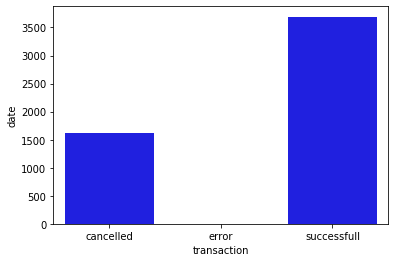

In [48]:
agg1 = data.groupby(['transaction'], as_index = False).agg({'date':'count'})
ax = sns.barplot(x="transaction", y="date", data=agg1, color = 'blue')

In [49]:
agg1

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


In [52]:
agg2 = data.query("transaction == 'successfull'") \
        .groupby(['name'], as_index = False).agg({'date':'count'})
agg2.head(5)

,name,date
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [54]:
agg2.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


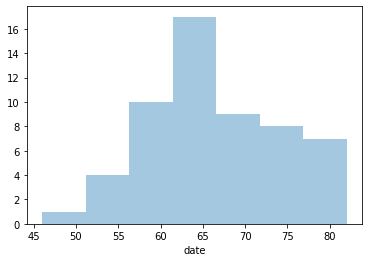

In [53]:
sns.distplot(agg2.date, kde=False)

In [56]:
data2 = pd.read_csv('data_lessons/transaction_data_updated.csv', sep = ',')

In [69]:
data2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [72]:
data2 = data2.fillna(0)
user_vs_minute_pivot = data2.pivot_table(values='date',columns = 'name', index = 'minute', aggfunc = 'count')

In [73]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [98]:
#минуты всего
data2['date'].dt.hour * 60 + data2['date'].dt.minute

0       37
1       59
2       66
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    75
Name: date, Length: 5315, dtype: int64